In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# Question 2 (c)  The process model 

In [37]:
t = np.arange(0,101,1)
x = np.zeros(len(t))

x[0]=np.random.normal(0,1)
for i in range (1,len(t)):
    x[i] = 0.7*x[i-1] + np.random.normal(0,0.5)

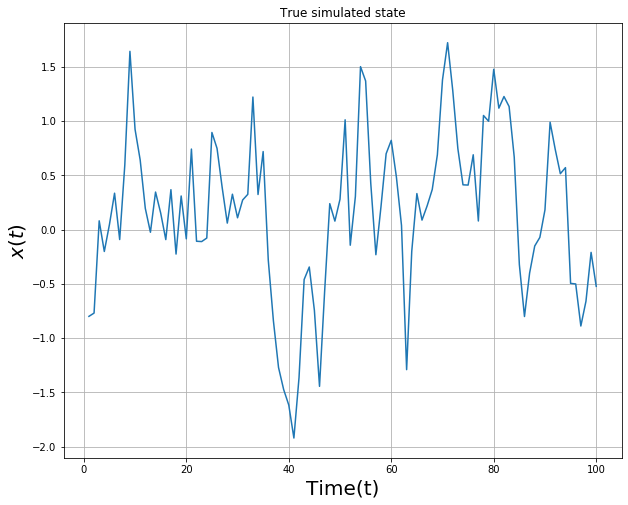

In [19]:
plt.figure(1,figsize=(10,8))
plt.plot(t[1:],x[1:])
plt.xlabel('Time(t)', fontsize=20)
plt.ylabel('$x(t)$', fontsize=20)
plt.title("True simulated state")
plt.grid()
plt.show()

# Question 2(d)  

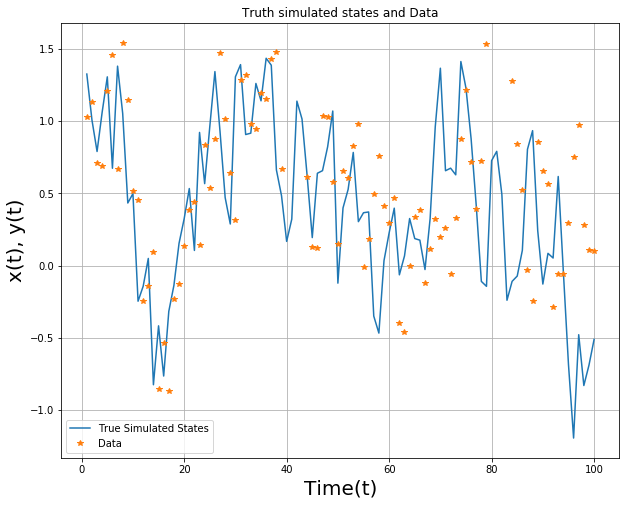

In [49]:
t1 = np.concatenate(( np.arange(1,40), np.arange(44,80), np.arange(84,101) ))

    
x1 = np.concatenate(( np.array(x[1:40]),np.array(x[44:80]), np.array(x[84:101])))
y = np.zeros(len(x1))
for i in range (len(x1)):
        y[i]=x[i]+ np.random.normal(0,0.1)


plt.figure(1,figsize=(10,8))
plt.plot(t[1:],x[1:])
plt.plot(t1,y,"*")
plt.legend( ['True Simulated States','Data'])
plt.xlabel('Time(t)', fontsize=20)
plt.ylabel('x(t), y(t)', fontsize=20)
plt.title("Truth simulated states and Data")
plt.grid()
plt.show()

# Question 2 (e)

In [51]:
alpha = 0.7
sig = 1
mu =0
q =0.5
r = 0.1
N = 100
r1= np.array([40,41,42,43, 80,81,82,83])
k=np.zeros(N)
mu_new=np.zeros(N)
sig_new=np.zeros(N)
mu_old=alpha*mu
sig_old=q+alpha*sig*alpha
y = np.zeros(len(x))
for i in range (len(x)):
    if (i in r1) == False:
        y[i]=x[i]+ np.random.normal(0,0.1)
    else:
        y[i] = 0
        
for i in range(0,N):
    if (i in r1) == False:
        k[i]=sig_old*(sig_old+r)**(-1)
        mu_new[i]=mu_old+k[i]*(y[i]-mu_old) 
        sig_new[i]=(1-k[i])*sig_old 
    else:
        mu_new[i]=mu_old 
        sig_new[i]=sig_old 
    mu_old=alpha*mu_new[i]
    sig_old=q+alpha**2*sig_new[i]


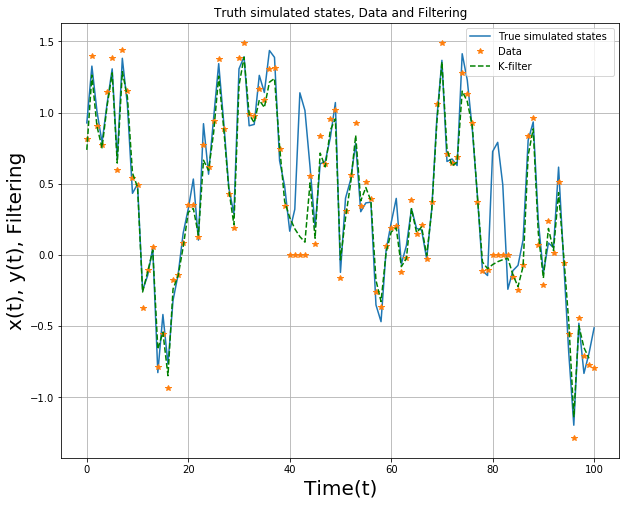

In [52]:
plt.figure(1,figsize=(10,8))
plt.plot(t,x)
plt.plot(t,y,"*")
plt.plot(mu_new,'--g')
plt.legend( ['True simulated states ','Data','K-filter'])
plt.title("Truth simulated states, Data and Filtering")
plt.xlabel('Time(t)', fontsize=20)
plt.ylabel('x(t), y(t), Filtering', fontsize=20)
plt.grid()
plt.show()

# Question 2(f)

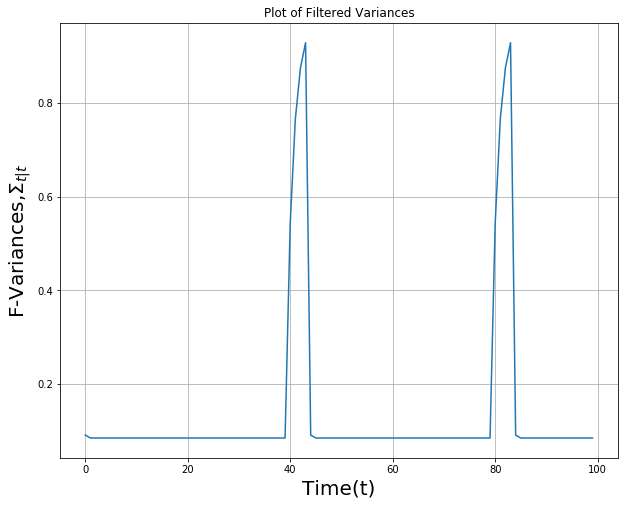

In [53]:
plt.figure(1,figsize=(10,8))
plt.plot(sig_new)
plt.title("Plot of Filtered Variances")
plt.xlabel('Time(t)', fontsize=20)
plt.ylabel('F-Variances,$\Sigma_{t|t}$', fontsize=20)
plt.grid()
plt.show()